In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
from skimage.transform import resize

In [10]:
def pca(A,kvalues):
    Amean = np.mean(A,axis=0)
    Acent = A - Amean
    
    Acov = np.dot(Acent.T,Acent)/(Acent.shape[0]-1)
    ev,eve = np.linalg.eig(Acov)

    si = np.argsort(ev)[::-1]
    ev = ev[si]
    eve = eve[:,si]

    fig,axes = plt.subplots(1,len(kvalues)+1,figsize=(4*(len(kvalues)+1),5))
    axes[0].imshow(A,cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('Off')

    for i,k in enumerate(kvalues):
        topeve = eve[:,:k]
        proj = np.dot(Acent,topeve)
        recon = np.dot(proj,topeve.T) + Amean
        recon = np.clip(recon,0,255)

        axes[i+1].imshow(recon,cmap='gray')
        axes[i+1].set_title(f'k = {k}')
        axes[i+1].axis('Off')

    plt.tight_layout()
    plt.show()

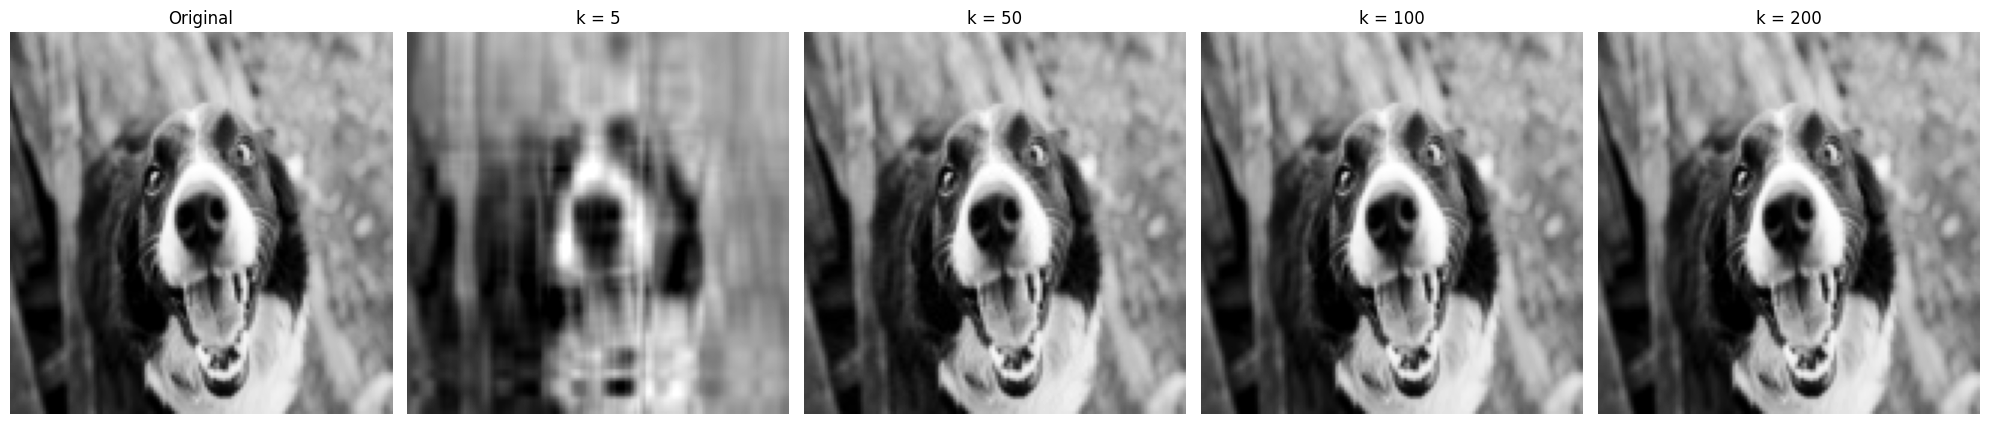

In [11]:
img = color.rgb2gray(io.imread('dog.png'))
img = resize(img,(128,128),anti_aliasing='True')*255
A = img.astype(float)
kvalues = [5,50,100,200]
pca(A,kvalues)

In [12]:
def dualpca(A,kvalues):
    Amean = np.mean(A,axis=0)
    Acent = A - Amean
    
    Acov = np.dot(Acent,Acent.T)/(Acent.shape[1]-1)
    ev,U = np.linalg.eigh(Acov)

    si = np.argsort(ev)[::-1]
    ev = ev[si]
    U = U[:,si]

    vall = []
    for i in range(len(ev)):
        if ev[i]>1e-10:
            v = np.dot(Acent.T,U[:,i])/np.sqrt(ev[i])
            vall.append(v)
        else:
            vall.append(np.zeros_like(Acent.T[:,0]))
    v = np.array(vall).T

    fig,axes = plt.subplots(1,len(kvalues)+1,figsize=(4*(len(kvalues)+1),5))
    axes[0].imshow(A,cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('Off')

    for i,k in enumerate(kvalues):
        topeve = v[:,:k]
        proj = np.dot(Acent,topeve)
        recon = np.dot(proj,topeve.T) + Amean
        recon = np.clip(recon,0,255)

        axes[i+1].imshow(recon,cmap='gray')
        axes[i+1].set_title(f'k = {k}')
        axes[i+1].axis('Off')

    plt.tight_layout()
    plt.show()

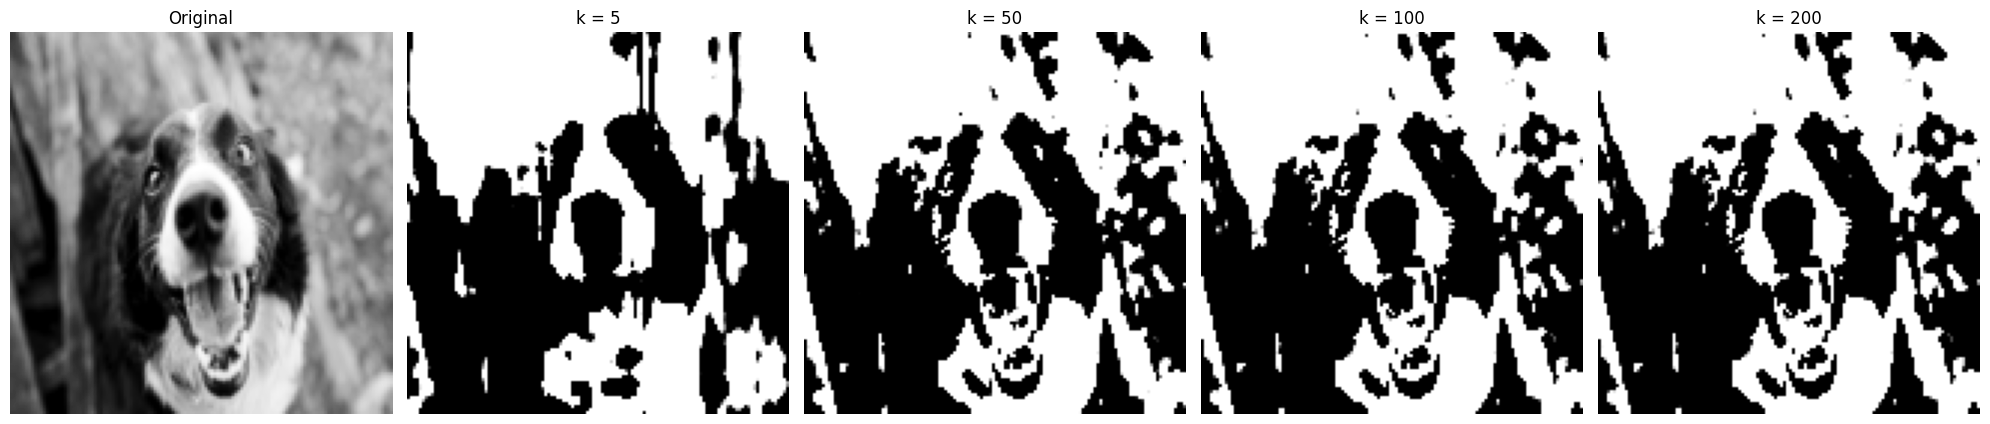

In [13]:
imga = color.rgb2gray(io.imread('dog.png'))
imga = resize(imga,(128,128),anti_aliasing='True')*255
An = img.astype(float)
kvalues = [5,50,100,200]
dualpca(An,kvalues)

In [19]:
def svd(A):
    ata = np.dot(A.T,A)
    eig,V = np.linalg.eigh(ata)

    si = np.argsort(eig)[::-1]
    eig = eig[si]
    V = V[:,si]

    sv = np.sqrt(np.maximum(eig,0))
    sigma = np.diag(sv)

    U = np.zeros((A.shape[0],len(eig)))
    for i in range(len(eig)):
        if eig[i]>1e-10:
            U[:,i] = np.dot(A,V[:,i])/np.sqrt(eig[i])
    

    print(U)
    print()

    print(sigma)
    print()

    print(V.T)
    print()



In [22]:
A = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [4,8]
])

A=A.astype(float)
svd(A)

[[ 0.17100852  0.16998712]
 [ 0.38368255 -0.2491787 ]
 [ 0.59635659 -0.66834452]
 [ 0.68403407  0.67994849]]

[[12.99861778  0.        ]
 [ 0.          1.42686225]]

[[ 0.54159415  0.8406401 ]
 [-0.8406401   0.54159415]]

